In [69]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab

In [3]:
results = pd.read_csv("Number Memorization Data - Sheet1.csv")

In [4]:
results.head()

,Name,Unchunk #,# Correct (UC),Chunk #,# Correct (C)
0,Alexis,17297907390238149226414802872582839,5,10611 12312 93085 55605 10581 81454 25792',10
1,Angelica,59295948629770291220106005306959668,6,26772 88425 58101 80348 61248 87767 52764,10
2,Anjali,56334420779787820951725598872575781,4,10182 13351 48203 27047 01205 86256 37184,11
3,Ariana,82218343732245991093852425971664767,4,37920 25089 25793 89070 97024 00241 98989,6
4,Avery,05596400928662988889364570084697837,4,11062 11557 31562 12302 84012 50533 94514,1


In [5]:
chunked = results["# Correct (C)"]
unchunked = results["# Correct (UC)"]

In [23]:
chunked_mean = chunked.mean()
chunked.mean()

6.0

In [24]:
unchunked_mean = unchunked.mean()
unchunked.mean()

5.9500000000000002

In [56]:
unchunked_std = np.std(unchunked)
chunked_std = np.std(chunked)

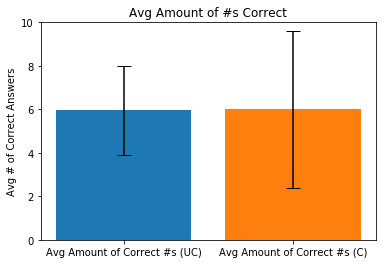

In [60]:
plt.bar(1, unchunked_mean, yerr = unchunked_std, capsize = 7)
plt.bar(2, chunked_mean, yerr = chunked_std, capsize = 7)
plt.xticks([1,2], ("Avg Amount of Correct #s (UC)", "Avg Amount of Correct #s (C)"))
plt.ylim(0, 10)
plt.ylabel("Avg # of Correct Answers")
plt.title("Avg Amount of #s Correct")
plt.savefig("Final Final Bar Chart")
plt.show()

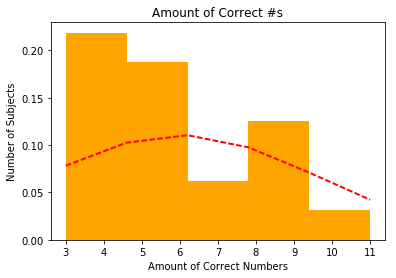

In [74]:
plt.clf()
(mu, sigma) = norm.fit(chunked)
n, bins, patches = plt.hist(unchunked, 5, normed=1, color = "orange", label = "chunked correct #")
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, "r--", linewidth=2)


'''plt.hist(chunked, bins = 5, color = "skyblue", label = "chunked correct #")
plt.hist(unchunked, bins = 5, color = "indigo", label = "unchunked correct #")'''

plt.title("Amount of Correct #s")
plt.ylabel("Number of Subjects")
plt.xlabel("Amount of Correct Numbers")
plt.savefig("Final Final Histogram")
plt.show()

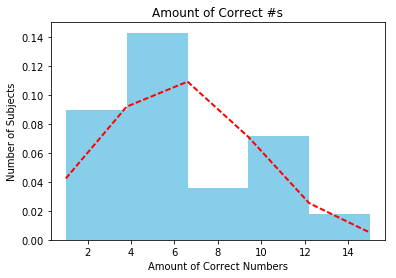

In [75]:
plt.clf()

(mu, sigma) = norm.fit(chunked)

n, bins, patches = plt.hist(chunked, 5, normed=1, color = "skyblue", label = "chunked correct #")

y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, "r--", linewidth=2)

plt.title("Amount of Correct #s")
plt.ylabel("Number of Subjects")
plt.xlabel("Amount of Correct Numbers")
plt.savefig("Final Final Histogram 2")
plt.show()

In [33]:
amount_chunked = 0
amount_unchunked = 0
amount_same = 0
for i in range(0, len(chunked)):
    if chunked[i] == unchunked[i]:
        amount_same += 1
    elif chunked[i] > unchunked[i]:
        amount_chunked += 1
    elif chunked[i] < unchunked[i]:
        amount_unchunked += 1

print(amount_chunked)
print(amount_unchunked)
print(amount_same)

11
9
0


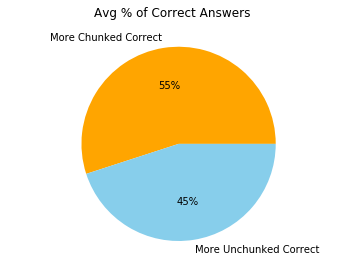

In [40]:
uc_c = [amount_chunked, amount_unchunked]

colors = ["orange", "skyblue"]
plt.pie(uc_c, labels=["More Chunked Correct","More Unchunked Correct"],autopct='%.0f%%', colors=colors)
plt.suptitle("Avg % of Correct Answers")
plt.savefig("Chunking Pie chart")

plt.axis("equal")
plt.show()

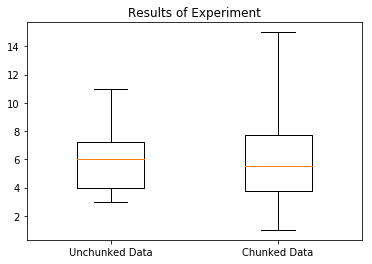

In [63]:
'''plt.boxplot(chunked,whis= 10)
plt.title("Chunked Data")
plt.show()
plt.boxplot(unchunked)
plt.title("Unchunked Data")
plt.show()'''

data = [unchunked, chunked]
plt.boxplot(data, whis = max(chunked), widths = .4)
plt.title("Results of Experiment")
plt.savefig("B&W for initial results")
plt.xticks([1, 2], ("Unchunked Data", "Chunked Data"))
plt.show()

In [64]:
#practice
'''my_list = [1, 5, 10, 3, 5, 2, 1, 7, 3, 4, 5, 9, 2, 4]
plt.boxplot(my_list)
plt.show()'''

'my_list = [1, 5, 10, 3, 5, 2, 1, 7, 3, 4, 5, 9, 2, 4]\nplt.boxplot(my_list)\nplt.show()'

In [65]:
#T-test
#two sample t-test
from scipy import stats
print(stats.ttest_ind(unchunked, chunked))
#High p-value strongly supports the null hypothesis

Ttest_indResult(statistic=-0.052631578947368231, pvalue=0.95830117175934304)
